In [24]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,age,emotion,gender,industry,revisit,store,time_spent
0,6,surprise,f,cos,0,1,25
1,15,surprise,f,cos,0,1,24
2,20,surprise,f,cos,0,1,28
3,19,neutral,f,cos,1,1,27
4,17,surprise,f,cos,0,1,28


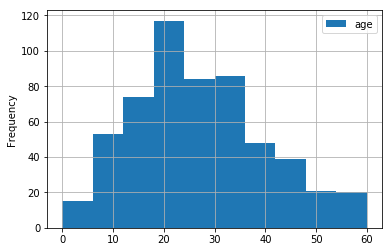

In [14]:
d_age = pd.DataFrame(df["age"])
plot_age = d_age.plot.hist(grid=True)

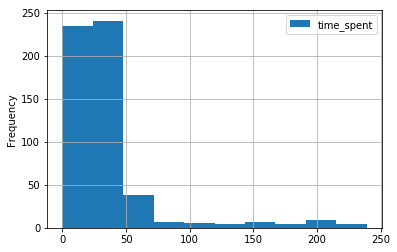

In [15]:
d_time = pd.DataFrame(df["time_spent"])
plot_time = d_time.plot.hist(grid=True)

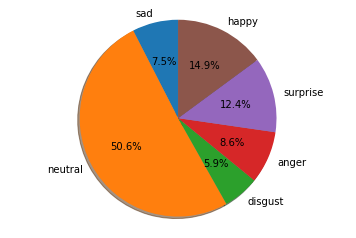

In [27]:
emo_plt = dict(pd.value_counts(df['emotion']))
fig_emo, ax_emo = plt.subplots()
ax_emo.pie(emo_plt.values(), labels=emo_plt.keys(),autopct='%1.1f%%', shadow=True, startangle=90)
ax_emo.axis('equal')
plt.show()

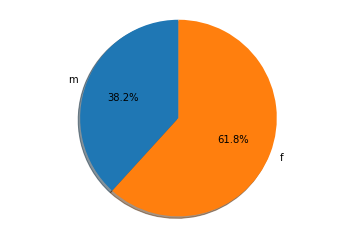

In [26]:
gender_plt = dict(pd.value_counts(df['gender']))
fig_gen, ax_gen = plt.subplots()
ax_gen.pie(gender_plt.values(), labels=gender_plt.keys(),autopct='%1.1f%%', shadow=True, startangle=90)
ax_gen.axis('equal')
plt.show()

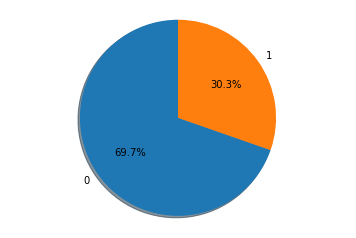

In [29]:
rev_plt = dict(pd.value_counts(df['revisit']))
fig_rev, ax_rev = plt.subplots()
ax_rev.pie(rev_plt.values(), labels=rev_plt.keys(),autopct='%1.1f%%', shadow=True, startangle=90)
ax_rev.axis('equal')
plt.show()

In [4]:
data = df['industry']
values = array(data)

print pd.value_counts(values)

app      167
elec     142
toys      93
jewel     63
cos       55
auto      37
dtype: int64


In [5]:
label_enc_industry = LabelEncoder()
int_enc_industry = label_enc_industry.fit_transform(values)
int_enc_industry = int_enc_industry.reshape(len(int_enc_industry), 1)

In [6]:
onehot_enc_industry = OneHotEncoder(sparse=False)
onehot_enc_industry = onehot_enc_industry.fit_transform(int_enc_industry)

rev_map_ind = lambda row: label_enc_industry.inverse_transform(argmax(row))

In [7]:
for i in range(df.industry.unique().shape[0]):
    col_name = label_enc_industry.inverse_transform(i)
    col_data = onehot_enc_industry[:,i]
    df[col_name] = col_data

In [8]:
label_encoder_emotion = LabelEncoder()
df["enc_emotion"] = label_encoder_emotion.fit_transform(df.emotion)
label_encoder_gender = LabelEncoder()
df["enc_gender"]= label_encoder_emotion.fit_transform(df.gender)

In [9]:
cols_X = ['age', 'revisit', 'time_spent', 'enc_emotion', 'enc_gender']
cols_y = ['app', 'auto', 'cos', 'elec', 'jewel', 'toys']
X = df[cols_X].values
y = df[cols_y].values

In [10]:
from sklearn.ensemble import RandomForestClassifier as clf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
ind_clf = clf(class_weight='balanced', random_state=69)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=69)

In [13]:
score_map = dict()
for i in range(len(cols_y)):
    ind_clf.fit(X_train,y_train[:,i])
    ind_name = label_enc_industry.inverse_transform(i)
    ind_accuracy = accuracy_score(y_test[:,i], ind_clf.predict(X_test))
    score_map[ind_name] = ind_accuracy

##### app      167
##### elec     142
##### toys      93
##### jewel     63
##### cos       55
##### auto      37

In [14]:
for ind, score in sorted(score_map.items(),key=lambda x: x[1],reverse=True):
    print ind,score

auto 0.9130434782608695
cos 0.8695652173913043
jewel 0.8586956521739131
toys 0.842391304347826
app 0.8369565217391305
elec 0.7336956521739131
